In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
kickstarters_2017 = pd.read_csv('./kickstart/ks-projects-201801.csv')
np.random.seed(0)

In [5]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)
# scale the goals form 0 to 1
scaled_data = minmax_scaling(original_data,columns=['usd_goal_real'])
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


/tmp/ipykernel_18355/2077494646.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(original_data.min()),
/tmp/ipykernel_18355/2077494646.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(original_data.max()))
/tmp/ipykernel_18355/2077494646.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(scaled_data.min()),
/tmp/ipykernel_18355/2077494646.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(scaled_data.max()))


## 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [7]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954154530838 
Maximum value: 30.690537060647134


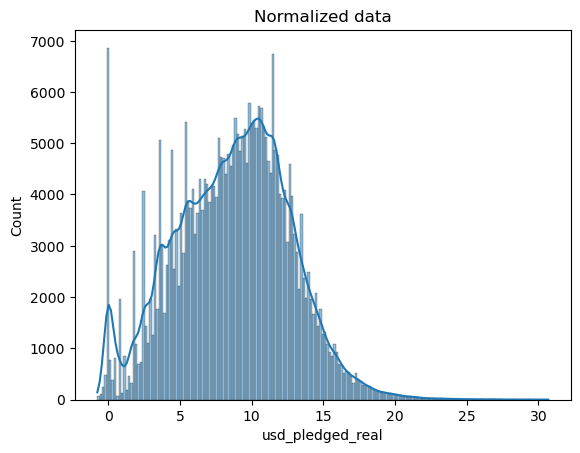

In [8]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()